# Reconocedor de lengua de signos

Vamos a desarrollar una red que reconozca lengua de signos. Para ello, vamos a utilizar un dataset contenido en nuestra cuenta de Google Drive. Antes, debemos montar nuestro sistema de archivos de Google Drive para hacerlo accesible desde este *notebook*. Google nos solicitará permiso, tenemos que copiar y pegar el código que nos suministra.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Ahora ya es accesible

¿Estoy realmente utilizando una GPU? Compruébalo en **Editar / Configuración del cuaderno** o **Entorno de ejecuación / Cambiar tipo de entorno de ejecución**

'Carpeta sin título'   Sign-Language
'Colab Notebooks'     'Untitled spreadsheet (1).gsheet'
 dogs_and_cats	      'Untitled spreadsheet.gsheet'
 insurance.csv


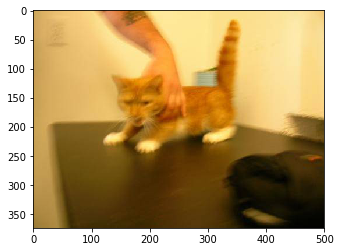

In [0]:
!ls "/content/drive/My Drive"

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/dogs_and_cats/train/cats/cat.0.jpg', 'r')
imshow(np.asarray(pil_im))



In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

## Primer modelo

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time


# DATA SOURCE --------------------------------------------------

batch_size = 32

train_data_dir = '/content/drive/My Drive/dogs_and_cats/train'
validation_data_dir = '/content/drive/My Drive/dogs_and_cats/validation'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1002 images belonging to 2 classes.


# Tuning learnig Rate with Adam optimizer


In [0]:
lr_values = [0.0001, 0.0003, 0.0006, 0.0009, 0.001, 0.003, 0.006, 0.009, 0.01, 0.03, 0.06, 0.09, 0.1]
history = []

epochs = 10

for lr in lr_values:
  print("Testing model for lr = " + str(lr)) 
  model = Sequential()
  model.add(Conv2D(kernel_size = 3, filters = 16, input_shape=(150, 150, 3)))
  model.add(Activation('relu'))
  model.add(Conv2D(kernel_size = 3, filters = 16))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Conv2D(kernel_size = 3, filters = 64))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.adam(lr=lr),
              metrics=['accuracy'])

  
  history.append(model.fit_generator(
                                     train_generator,
                                     steps_per_epoch=ceil(2000 / batch_size),
                                     epochs=epochs, 
                                     validation_data=validation_generator,
                                     validation_steps=ceil(1002/ batch_size),
  ))
  
  
  

Testing model for lr = 0.0001
Epoch 1/10
63/63 [==============================] - 683s 11s/step - loss: 0.6998 - acc: 0.5015 - val_loss: 0.6911 - val_acc: 0.4870
Epoch 2/10
63/63 [==============================] - 25s 401ms/step - loss: 0.6888 - acc: 0.5253 - val_loss: 0.6861 - val_acc: 0.5070
Epoch 3/10
63/63 [==============================] - 26s 406ms/step - loss: 0.6859 - acc: 0.5417 - val_loss: 0.6864 - val_acc: 0.5000
Epoch 4/10
63/63 [==============================] - 26s 406ms/step - loss: 0.6791 - acc: 0.5565 - val_loss: 0.6757 - val_acc: 0.5329
Epoch 5/10
63/63 [==============================] - 26s 409ms/step - loss: 0.6731 - acc: 0.5784 - val_loss: 0.6693 - val_acc: 0.5429
Epoch 6/10
63/63 [==============================] - 26s 410ms/step - loss: 0.6678 - acc: 0.5853 - val_loss: 0.6609 - val_acc: 0.6078
Epoch 7/10
63/63 [==============================] - 27s 429ms/step - loss: 0.6633 - acc: 0.6057 - val_loss: 0.6673 - val_acc: 0.5629
Epoch 8/10
63/63 [======================

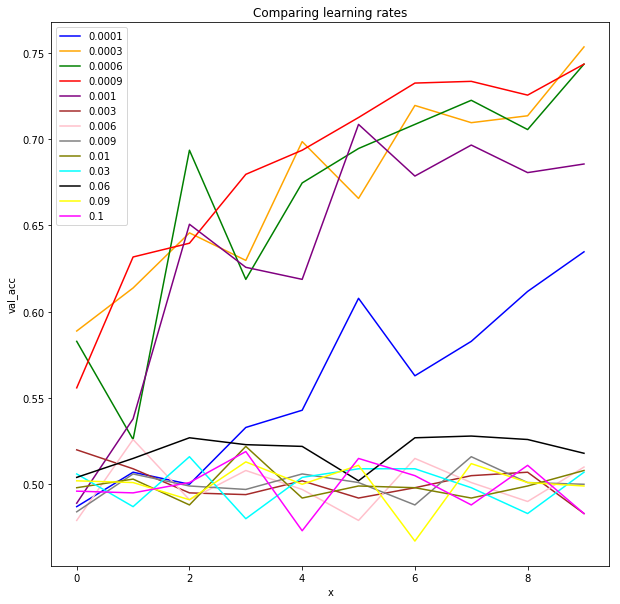

In [0]:
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'black', 'yellow', 'magenta']
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for indx, h in enumerate(history):
  plt.plot(h.history['val_acc'], color=colors[indx % len(colors)], label=str(lr_values[indx]))
  

plt.title('Comparing learning rates')
plt.ylabel('val_acc')
plt.xlabel('x')
plt.legend()

# Using the best result learning rate from the past step

In [0]:
epochs = 50

model = Sequential()
model.add(Conv2D(kernel_size = 3, filters = 16, input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(Conv2D(kernel_size = 3, filters = 16))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(kernel_size = 3, filters = 64))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.adam(lr=0.0009),
              metrics=['accuracy'])

  
model.fit_generator(train_generator,
                    steps_per_epoch=ceil(2000 / batch_size),
                    epochs=epochs, 
                    validation_data=validation_generator,
                    validation_steps=ceil(1002/ batch_size),
  )

Epoch 1/50
63/63 [==============================] - 30s 473ms/step - loss: 0.7154 - acc: 0.5159 - val_loss: 0.6742 - val_acc: 0.5888
Epoch 2/50
63/63 [==============================] - 24s 374ms/step - loss: 0.6608 - acc: 0.5823 - val_loss: 0.6538 - val_acc: 0.5988
Epoch 3/50
63/63 [==============================] - 24s 378ms/step - loss: 0.6596 - acc: 0.5883 - val_loss: 0.6376 - val_acc: 0.6048
Epoch 4/50
63/63 [==============================] - 23s 371ms/step - loss: 0.6163 - acc: 0.6572 - val_loss: 0.5746 - val_acc: 0.6886
Epoch 5/50
63/63 [==============================] - 24s 386ms/step - loss: 0.5946 - acc: 0.6736 - val_loss: 0.6091 - val_acc: 0.6367
Epoch 6/50
63/63 [==============================] - 24s 378ms/step - loss: 0.5352 - acc: 0.7311 - val_loss: 0.5833 - val_acc: 0.7036
Epoch 7/50
63/63 [==============================] - 24s 378ms/step - loss: 0.5172 - acc: 0.7510 - val_loss: 0.5304 - val_acc: 0.7315
Epoch 8/50
63/63 [==============================] - 23s 370ms/step - 

In [0]:
model.summary()
model.save_weights('80.h5')
model.save('80_model')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
activation_44 (Activation)   (None, 148, 148, 16)      0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 146, 146, 16)      2320      
_________________________________________________________________
activation_45 (Activation)   (None, 146, 146, 16)      0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 73, 73, 16)        0         
_________________________________________________________________
activation_46 (Activation)   (None, 73, 73, 16)        0         
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 36, 36, 16)        0         
__________

In [0]:
model.fit_generator(train_generator,
                    steps_per_epoch=ceil(2000 / batch_size),
                    epochs=epochs, 
                    validation_data=validation_generator,
                    validation_steps=ceil(1002/ batch_size),
  )

Epoch 1/50
63/63 [==============================] - 29s 463ms/step - loss: 0.1054 - acc: 0.9584 - val_loss: 0.8567 - val_acc: 0.7665
Epoch 2/50
63/63 [==============================] - 25s 400ms/step - loss: 0.1168 - acc: 0.9598 - val_loss: 0.8077 - val_acc: 0.7944
Epoch 3/50
63/63 [==============================] - 26s 418ms/step - loss: 0.0885 - acc: 0.9668 - val_loss: 0.8588 - val_acc: 0.7884
Epoch 4/50
63/63 [==============================] - 26s 405ms/step - loss: 0.0892 - acc: 0.9678 - val_loss: 0.7987 - val_acc: 0.7685
Epoch 5/50
63/63 [==============================] - 26s 419ms/step - loss: 0.0948 - acc: 0.9638 - val_loss: 0.8372 - val_acc: 0.7884
Epoch 6/50
63/63 [==============================] - 25s 404ms/step - loss: 0.1045 - acc: 0.9638 - val_loss: 0.8324 - val_acc: 0.7824
Epoch 7/50
63/63 [==============================] - 26s 406ms/step - loss: 0.0962 - acc: 0.9638 - val_loss: 0.8283 - val_acc: 0.7844
Epoch 8/50
63/63 [==============================] - 27s 421ms/step - 

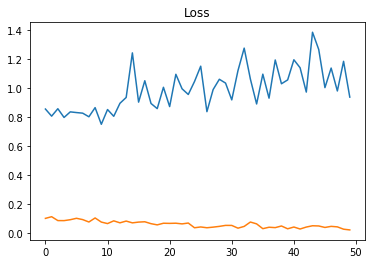

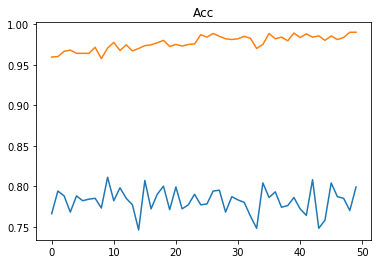

In [0]:
plt.show()
plt.title("Loss")
plt.plot(model.history.history['val_loss'])
plt.plot(model.history.history['loss'])
plt.show()
plt.title("Acc")
plt.plot(model.history.history['val_acc'])
plt.plot(model.history.history['acc'])
